# Q1 BASIC EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv('house_price.csv')
# Basic info
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique locations:", df['location'].nunique())
print("Unique sizes:", df['size'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

Summary statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%    

# Q2 Outlier Detection and Treatment

# a) Mean and Standard Deviation Method

In [3]:
# Calculate mean and std
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define outlier thresholds (3 std from mean)
lower_bound = mean - 3*std
upper_bound = mean + 3*std

print(f"Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers_sd = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print(f"\nNumber of outliers (SD method): {len(outliers_sd)}")

# Capping method
df_sd_capped = df.copy()
df_sd_capped['price_per_sqft'] = np.where(df_sd_capped['price_per_sqft'] < lower_bound, lower_bound,
                                        np.where(df_sd_capped['price_per_sqft'] > upper_bound, upper_bound, 
                                                df_sd_capped['price_per_sqft']))

Mean: 7920.34, Std: 106727.16
Lower bound: -312261.14, Upper bound: 328101.82

Number of outliers (SD method): 5


# b) Percentile Method

In [5]:
# Define percentiles (5th and 95th)
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

print(f"5th percentile: {lower_percentile:.2f}, 95th percentile: {upper_percentile:.2f}")

# Identify outliers
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print(f"\nNumber of outliers (Percentile method): {len(outliers_percentile)}")

# Trimming method
df_percentile_trimmed = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

5th percentile: 3107.85, 95th percentile: 15312.10

Number of outliers (Percentile method): 1320


# c) IQR Method

In [7]:
# Calculate IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_iqr = Q1 - 1.5*IQR
upper_iqr = Q3 + 1.5*IQR

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_iqr:.2f}, Upper bound: {upper_iqr:.2f}")

# Identify outliers
outliers_iqr = df[(df['price_per_sqft'] < lower_iqr) | (df['price_per_sqft'] > upper_iqr)]
print(f"\nNumber of outliers (IQR method): {len(outliers_iqr)}")

# Imputation with median
median = df['price_per_sqft'].median()
df_iqr_imputed = df.copy()
df_iqr_imputed['price_per_sqft'] = np.where(df_iqr_imputed['price_per_sqft'] < lower_iqr, median,
                                          np.where(df_iqr_imputed['price_per_sqft'] > upper_iqr, median, 
                                                  df_iqr_imputed['price_per_sqft']))

Q1: 4267.00, Q3: 7317.00, IQR: 3050.00
Lower bound: -308.00, Upper bound: 11892.00

Number of outliers (IQR method): 1265


# d) Z-Score Method

In [9]:
# Calculate Z-scores
df['z_score'] = np.abs(stats.zscore(df['price_per_sqft']))

# Define threshold (3 standard deviations)
threshold = 3

# Identify outliers
outliers_z = df[df['z_score'] > threshold]
print(f"Number of outliers (Z-score method): {len(outliers_z)}")

# Trimming method
df_z_trimmed = df[df['z_score'] <= threshold]

Number of outliers (Z-score method): 5


# Q3. Box Plot Comparison

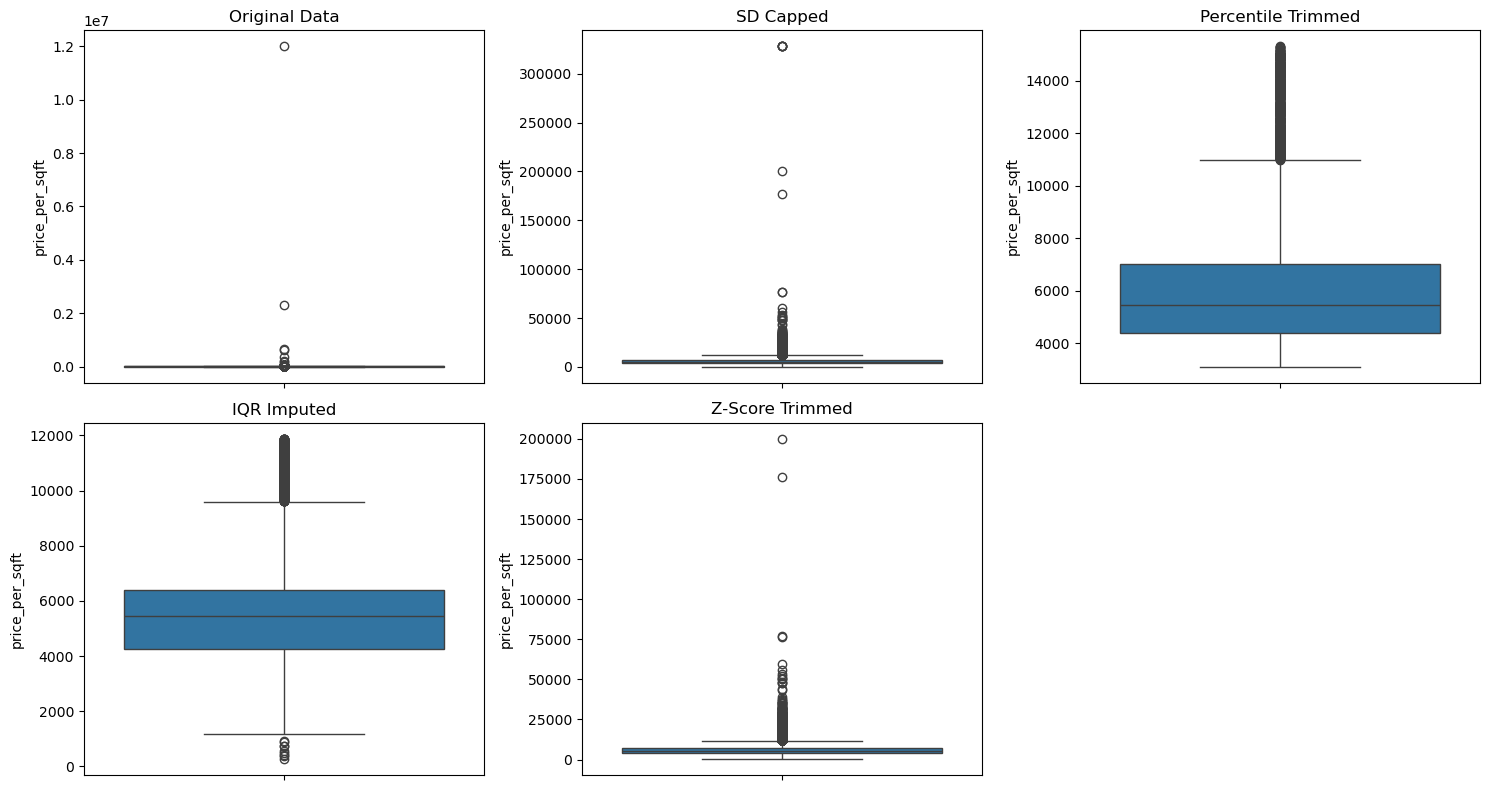

In [11]:
plt.figure(figsize=(15, 8))

# Original data
plt.subplot(2, 3, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original Data')

# SD Capped
plt.subplot(2, 3, 2)
sns.boxplot(y=df_sd_capped['price_per_sqft'])
plt.title('SD Capped')

# Percentile Trimmed
plt.subplot(2, 3, 3)
sns.boxplot(y=df_percentile_trimmed['price_per_sqft'])
plt.title('Percentile Trimmed')

# IQR Imputed
plt.subplot(2, 3, 4)
sns.boxplot(y=df_iqr_imputed['price_per_sqft'])
plt.title('IQR Imputed')

# Z-Score Trimmed
plt.subplot(2, 3, 5)
sns.boxplot(y=df_z_trimmed['price_per_sqft'])
plt.title('Z-Score Trimmed')

plt.tight_layout()
plt.show()

# Q4. Normality Check and Transformations

Original Skewness: 108.28, Kurtosis: 12095.22
Transformed Skewness: 1.40, Kurtosis: 9.21


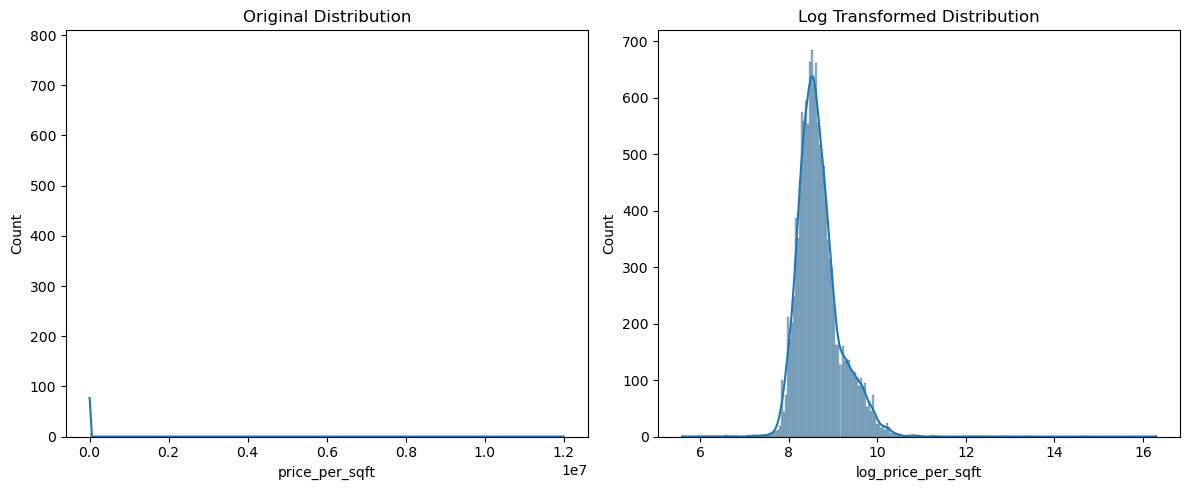

In [13]:
# Original distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Distribution')

# Calculate skewness and kurtosis
original_skew = df['price_per_sqft'].skew()
original_kurt = df['price_per_sqft'].kurtosis()
print(f"Original Skewness: {original_skew:.2f}, Kurtosis: {original_kurt:.2f}")

# Log transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

plt.subplot(1, 2, 2)
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Distribution')

# Calculate skewness and kurtosis after transformation
transformed_skew = df['log_price_per_sqft'].skew()
transformed_kurt = df['log_price_per_sqft'].kurtosis()
print(f"Transformed Skewness: {transformed_skew:.2f}, Kurtosis: {transformed_kurt:.2f}")

plt.tight_layout()
plt.show()

# Q5. Correlation Analysis

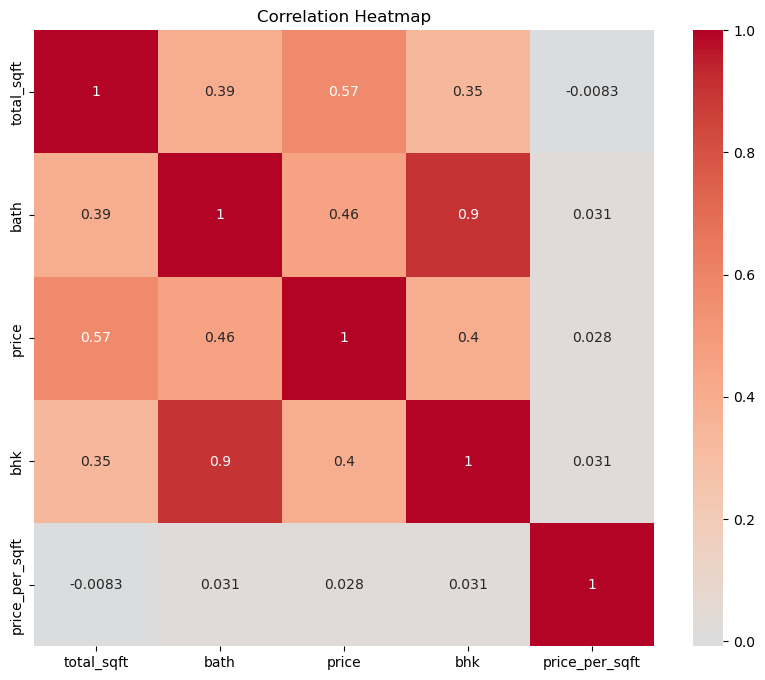

In [14]:
# Select numerical columns
numerical_cols = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
corr_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Q6. Scatter Plots

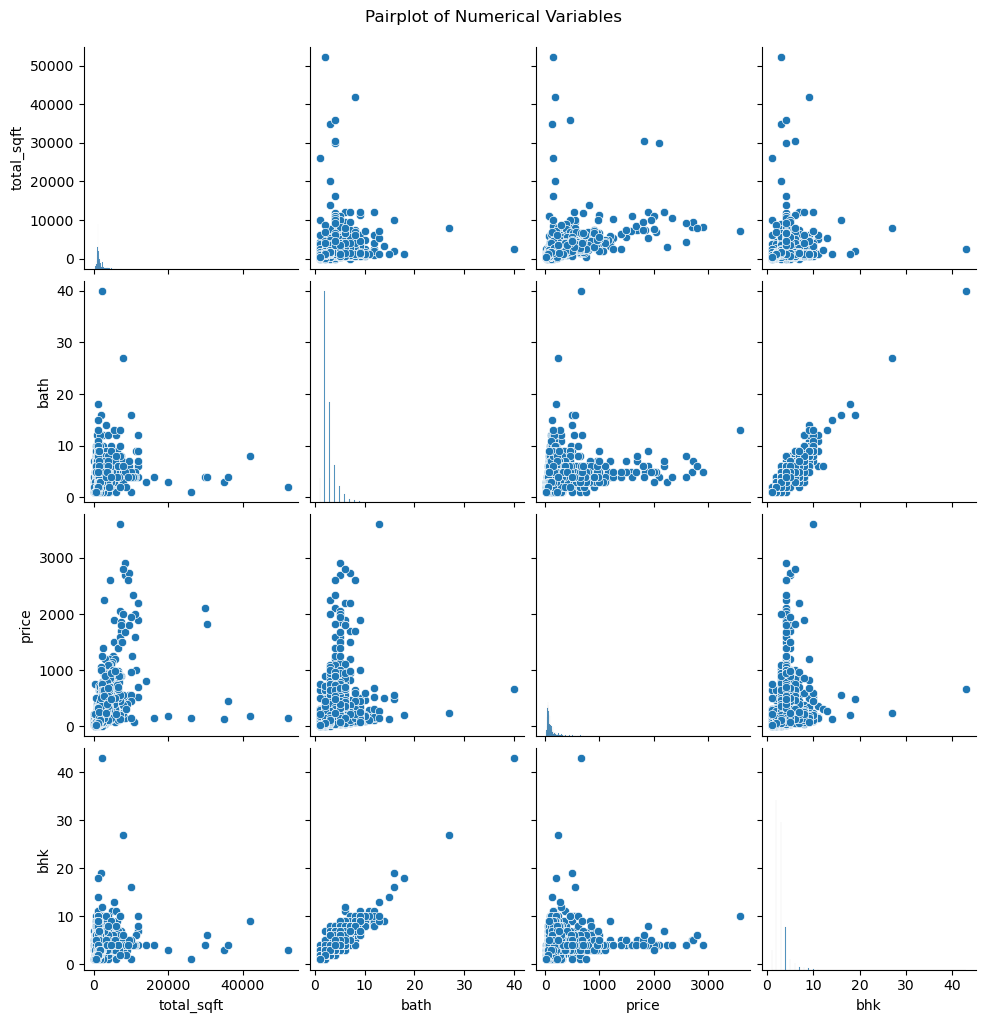

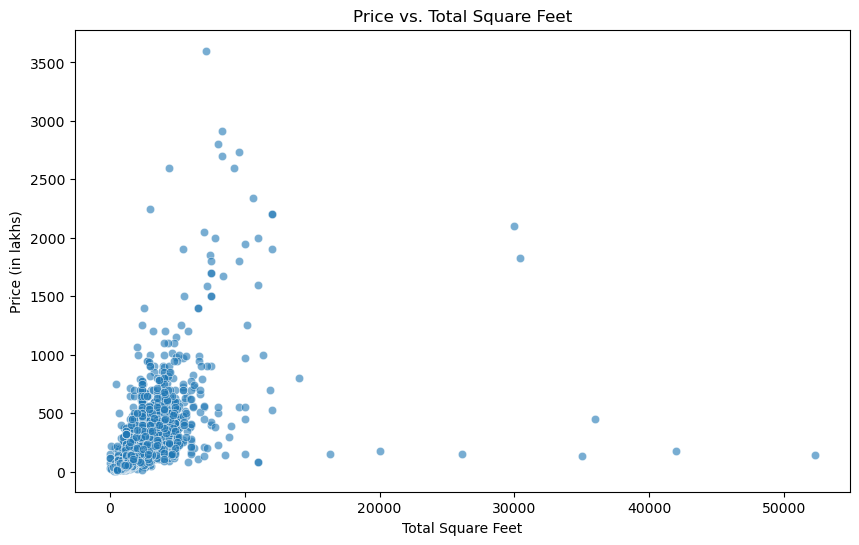

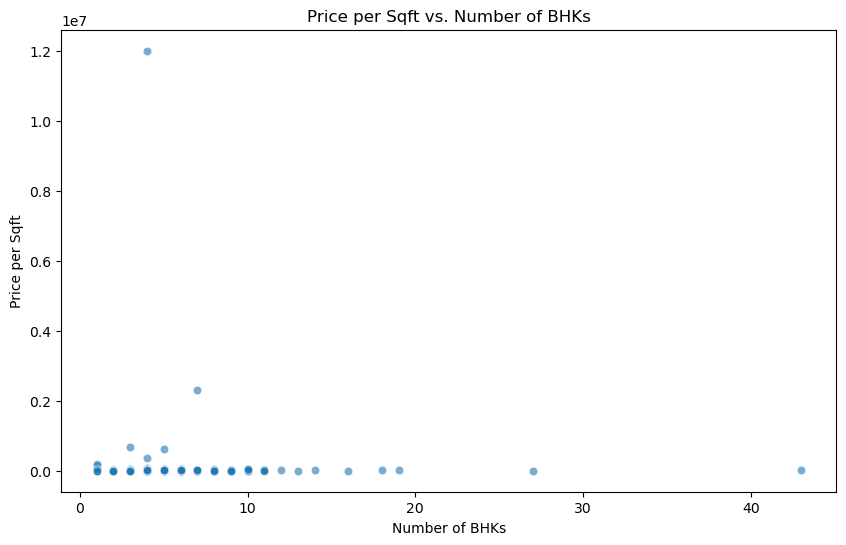

In [16]:
# Pairplot of key variables
sns.pairplot(df[['total_sqft', 'bath', 'price', 'bhk']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Scatter plot of price vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df, alpha=0.6)
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in lakhs)')
plt.show()

# Scatter plot of price per sqft vs. BHK
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bhk', y='price_per_sqft', data=df, alpha=0.6)
plt.title('Price per Sqft vs. Number of BHKs')
plt.xlabel('Number of BHKs')
plt.ylabel('Price per Sqft')
plt.show()